In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('train_mapped.csv')
df.head()

,Unnamed: 0,ID,Tweet,Labels,Depressed
0,0,1,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,0 10,0
1,1,2,BanMediaHouse whose is responsible for spreadi...,6,1
2,2,3,Im waiting for someone to say to me that all t...,3 4,1
3,3,4,He is a liar. Proven day night. Time again. Li...,6,1
4,4,5,"NEW: U.S. CoronaVirus death toll reaches 4,000...",8,0


In [ ]:
df['Depressed'].value_counts()

1    2801
0    2199
Name: Depressed, dtype: int64

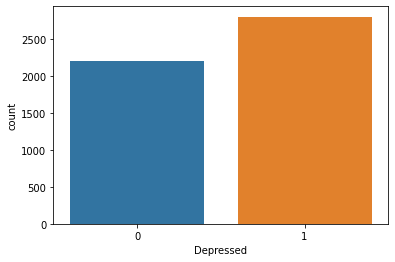

In [ ]:
sns.countplot(df['Depressed'])

In [ ]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [ ]:
# remove @
df['clean_tweet'] = np.vectorize(remove_pattern)(df['Tweet'], "@[\w]*")

In [ ]:
df.head()

,Unnamed: 0,ID,Tweet,Labels,Depressed,clean_tweet
0,0,1,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,0 10,0,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...
1,1,2,BanMediaHouse whose is responsible for spreadi...,6,1,BanMediaHouse whose is responsible for spreadi...
2,2,3,Im waiting for someone to say to me that all t...,3 4,1,Im waiting for someone to say to me that all t...
3,3,4,He is a liar. Proven day night. Time again. Li...,6,1,He is a liar. Proven day night. Time again. Li...
4,4,5,"NEW: U.S. CoronaVirus death toll reaches 4,000...",8,0,"NEW: U.S. CoronaVirus death toll reaches 4,000..."


In [ ]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,Unnamed: 0,ID,Tweet,Labels,Depressed,clean_tweet
0,0,1,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,0 10,0,JOKE WILL PLANE Well after COVID
1,1,2,BanMediaHouse whose is responsible for spreadi...,6,1,BanMediaHouse whose responsible spreading Fake...
2,2,3,Im waiting for someone to say to me that all t...,3 4,1,waiting someone that this corona thing just Ap...
3,3,4,He is a liar. Proven day night. Time again. Li...,6,1,liar Proven night Time again Lies when truth w...
4,4,5,"NEW: U.S. CoronaVirus death toll reaches 4,000...",8,0,CoronaVirus death toll reaches after nearly de...


In [ ]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,Unnamed: 0,ID,Tweet,Labels,Depressed,clean_tweet
0,0,1,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,0 10,0,JOKE WILL PLANE Well after COVID
1,1,2,BanMediaHouse whose is responsible for spreadi...,6,1,BanMediaHouse whose responsible spreading Fake...
2,2,3,Im waiting for someone to say to me that all t...,3 4,1,waiting someone that this corona thing just Ap...
3,3,4,He is a liar. Proven day night. Time again. Li...,6,1,liar Proven night Time again Lies when truth w...
4,4,5,"NEW: U.S. CoronaVirus death toll reaches 4,000...",8,0,CoronaVirus death toll reaches after nearly de...


In [ ]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0              [JOKE, WILL, PLANE, Well, after, COVID]
1    [BanMediaHouse, whose, responsible, spreading,...
2    [waiting, someone, that, this, corona, thing, ...
3    [liar, Proven, night, Time, again, Lies, when,...
4    [CoronaVirus, death, toll, reaches, after, nea...
Name: clean_tweet, dtype: object

In [ ]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0              [joke, will, plane, well, after, covid]
1    [banmediahous, whose, respons, spread, fake, c...
2    [wait, someon, that, thi, corona, thing, just,...
3    [liar, proven, night, time, again, lie, when, ...
4    [coronaviru, death, toll, reach, after, nearli...
Name: clean_tweet, dtype: object

In [ ]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,Unnamed: 0,ID,Tweet,Labels,Depressed,clean_tweet
0,0,1,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,0 10,0,joke will plane well after covid
1,1,2,BanMediaHouse whose is responsible for spreadi...,6,1,banmediahous whose respons spread fake commun ...
2,2,3,Im waiting for someone to say to me that all t...,3 4,1,wait someon that thi corona thing just april f...
3,3,4,He is a liar. Proven day night. Time again. Li...,6,1,liar proven night time again lie when truth wi...
4,4,5,"NEW: U.S. CoronaVirus death toll reaches 4,000...",8,0,coronaviru death toll reach after nearli death...


In [ ]:
!pip install wordcloud

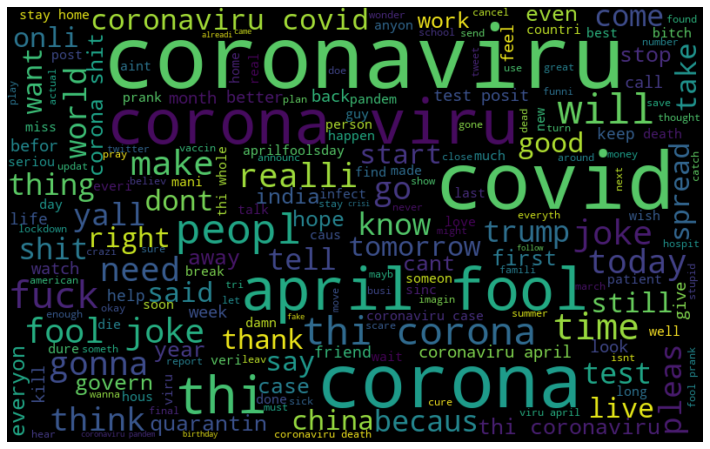

In [ ]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

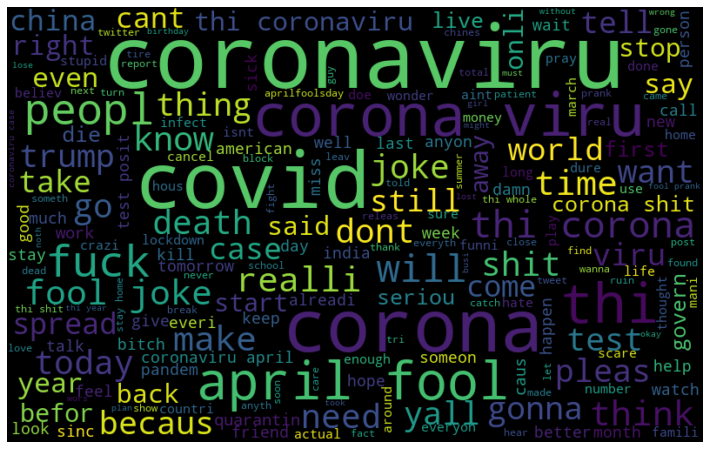

In [ ]:
# frequent words visualization for Depressed Tweets
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['Depressed']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

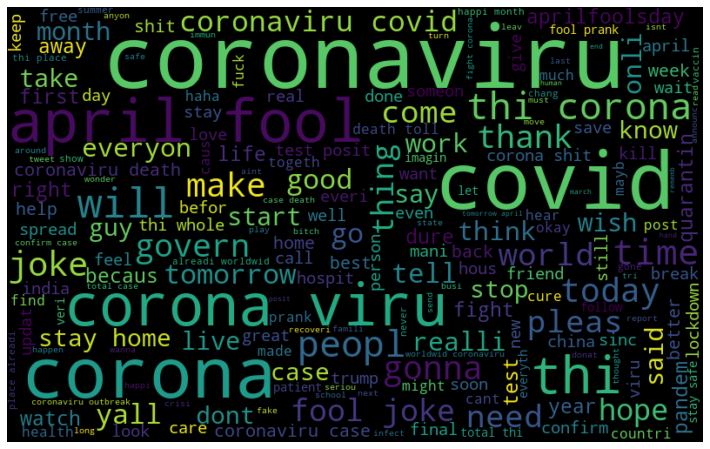

In [ ]:
# frequent words visualization for Not Depressed Tweets
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['Depressed']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"(\w+)", tweet)
        hashtags.append(ht)
    return hashtags 

In [ ]:
# extract hashtags from depressed tweets
ht_depressed = hashtag_extract(df['clean_tweet'][df['Depressed']==1])
# extract hashtags from non-depressed tweets
ht_not_depressed = hashtag_extract(df['clean_tweet'][df['Depressed']==0])

In [ ]:
ht_depressed[:6]

[['banmediahous',
  'whose',
  'respons',
  'spread',
  'fake',
  'commun',
  'stori',
  'thi',
  'pandem',
  'corona',
  'situat'],
 ['wait',
  'someon',
  'that',
  'thi',
  'corona',
  'thing',
  'just',
  'april',
  'fool',
  'joke'],
 ['liar',
  'proven',
  'night',
  'time',
  'again',
  'lie',
  'when',
  'truth',
  'will',
  'covid'],
 ['coronaviru', 'impact', 'govt', 'extend', 'deadlin', 'relat', 'section'],
 ['peopl',
  'might',
  'have',
  'die',
  'china',
  'from',
  'covid',
  'china',
  'underreport',
  'accord',
  'sourc'],
 ['dear',
  'chines',
  'kindli',
  'cook',
  'your',
  'thoroughli',
  'next',
  'time',
  'regard',
  'covid',
  'coronavirusupd',
  'coronaviru']]

In [ ]:
ht_depressed = sum(ht_depressed, [])
ht_not_depressed = sum(ht_not_depressed, [])

In [ ]:
ht_not_depressed[:7]

['joke', 'will', 'plane', 'well', 'after', 'covid', 'coronaviru']

In [ ]:
ht_depressed[:7]

['banmediahous', 'whose', 'respons', 'spread', 'fake', 'commun', 'stori']

In [ ]:
freq = nltk.FreqDist(ht_not_depressed)
d = pd.DataFrame({'Non_Depressed_Words': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Non_Depressed_Words,Count
0,joke,162
1,will,122
2,plane,1
3,well,30
4,after,59


In [ ]:
freq = nltk.FreqDist(ht_depressed)
d = pd.DataFrame({'Depressed_Words': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Depressed_Words,Count
0,banmediahous,1
1,whose,3
2,respons,16
3,spread,71
4,fake,20


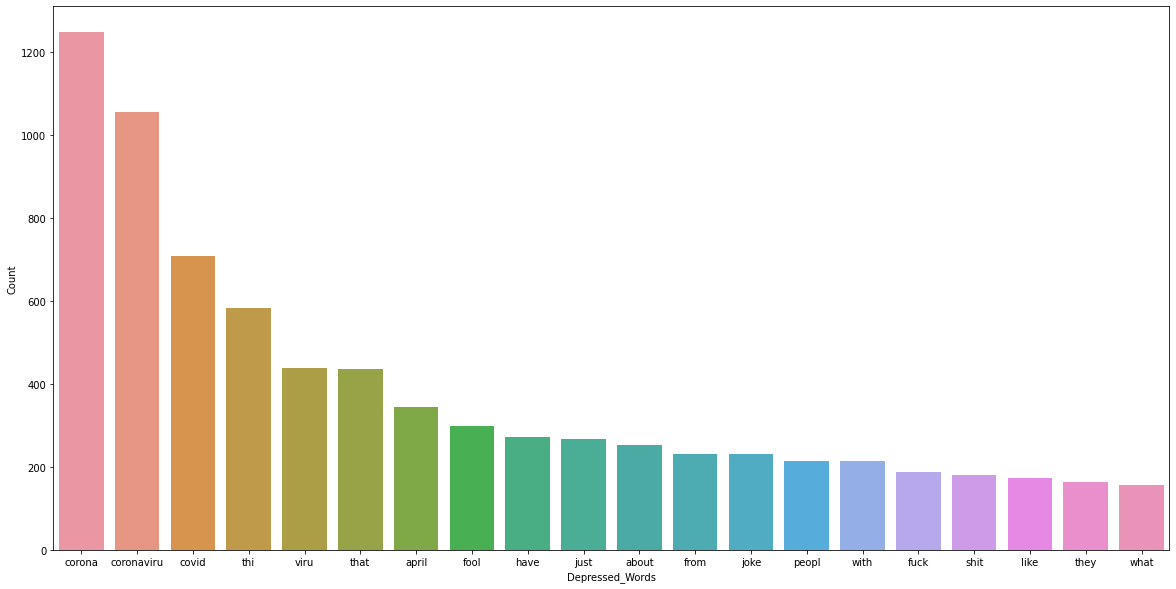

In [ ]:
# select top 20 Depressed Words
d = d.nlargest(columns='Count', n=20)
plt.figure(figsize=(20,10))
sns.barplot(data=d, x='Depressed_Words', y='Count')
plt.show()

In [ ]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [ ]:
#bow[2].toarray()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['Depressed'], random_state=42, test_size=0.2)

In [ ]:
# import performance matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# **Model 1: Logistic Regression**






In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel1 = LogisticRegression()
logmodel1.fit(x_train,y_train)

LogisticRegression()

In [ ]:
%%time
predictions1 = logmodel1.predict(x_test)
print(confusion_matrix(y_test,predictions1))
print(accuracy_score(y_test,predictions1))
print(classification_report(y_test,predictions1))

[[238 190]
 [169 403]]
0.641
              precision    recall  f1-score   support

           0       0.58      0.56      0.57       428
           1       0.68      0.70      0.69       572

    accuracy                           0.64      1000
   macro avg       0.63      0.63      0.63      1000
weighted avg       0.64      0.64      0.64      1000

CPU times: user 11 ms, sys: 930 µs, total: 12 ms
Wall time: 14.8 ms


# **Model 2: Decision Tree**

In [ ]:

from sklearn.tree import DecisionTreeClassifier
logmodel2 = DecisionTreeClassifier()
logmodel2.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
%%time
predictions2 = logmodel2.predict(x_test)
print(confusion_matrix(y_test,predictions2))
print(accuracy_score(y_test,predictions2))
print(classification_report(y_test,predictions2))

[[272 156]
 [249 323]]
0.595
              precision    recall  f1-score   support

           0       0.52      0.64      0.57       428
           1       0.67      0.56      0.61       572

    accuracy                           0.59      1000
   macro avg       0.60      0.60      0.59      1000
weighted avg       0.61      0.59      0.60      1000

CPU times: user 14.3 ms, sys: 670 µs, total: 14.9 ms
Wall time: 17.2 ms


# **Model 3: Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
logmodel3 = RandomForestClassifier()
logmodel3.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
%%time
predictions3 = logmodel3.predict(x_test)
print(confusion_matrix(y_test,predictions3))
print(accuracy_score(y_test,predictions3))
print(classification_report(y_test,predictions3))

[[256 172]
 [205 367]]
0.623
              precision    recall  f1-score   support

           0       0.56      0.60      0.58       428
           1       0.68      0.64      0.66       572

    accuracy                           0.62      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.63      0.62      0.62      1000

CPU times: user 80.9 ms, sys: 1.09 ms, total: 82 ms
Wall time: 86.4 ms


# **Model:4 Support Vector Machines**

In [ ]:
from sklearn.svm import SVC
logmodel4 = SVC()
logmodel4.fit(x_train,y_train)

SVC()

In [ ]:
%%time
predictions4 = logmodel4.predict(x_test)
print(confusion_matrix(y_test,predictions4))
print(accuracy_score(y_test,predictions4))
print(classification_report(y_test,predictions4))

[[210 218]
 [119 453]]
0.663
              precision    recall  f1-score   support

           0       0.64      0.49      0.55       428
           1       0.68      0.79      0.73       572

    accuracy                           0.66      1000
   macro avg       0.66      0.64      0.64      1000
weighted avg       0.66      0.66      0.65      1000

CPU times: user 435 ms, sys: 4.94 ms, total: 440 ms
Wall time: 673 ms


# **Model:5 Artificial Neural Network**

In [ ]:
from sklearn.neural_network import MLPClassifier
logmodel5 = MLPClassifier()
logmodel5.fit(x_train,y_train)

MLPClassifier()

In [ ]:
%%time
predictions5 = logmodel5.predict(x_test)
print(confusion_matrix(y_test,predictions5))
print(accuracy_score(y_test,predictions5))
print(classification_report(y_test,predictions5))

[[254 174]
 [211 361]]
0.615
              precision    recall  f1-score   support

           0       0.55      0.59      0.57       428
           1       0.67      0.63      0.65       572

    accuracy                           0.61      1000
   macro avg       0.61      0.61      0.61      1000
weighted avg       0.62      0.61      0.62      1000

CPU times: user 21.6 ms, sys: 12.3 ms, total: 33.8 ms
Wall time: 26.7 ms


**Graph**



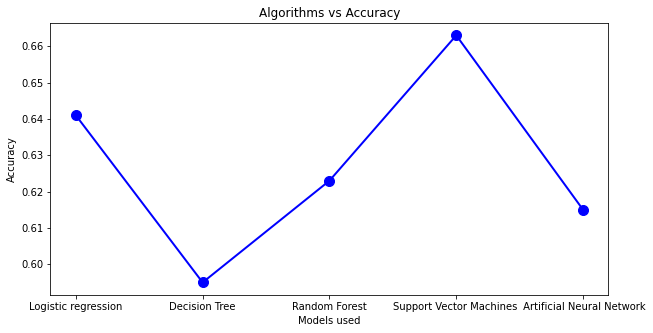

In [ ]:
mod_accuracy=[accuracy_score(y_test,predictions1),accuracy_score(y_test,predictions2),accuracy_score(y_test,predictions3),accuracy_score(y_test,predictions4),accuracy_score(y_test,predictions5)]
models=["Logistic regression","Decision Tree","Random Forest","Support Vector Machines "," Artificial Neural Network"]
plt.figure(figsize=(10,5))
plt.plot(models,mod_accuracy,'bo',linestyle='solid',linewidth=2, markersize=10)
plt.xlabel("Models used")
plt.ylabel("Accuracy")
plt.title("Algorithms vs Accuracy")
plt.show()